# Exploratory Data Analysis on MongoDB database

In [1]:
#Importing Necessary modules

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#Importing the necessary csv file

df= pd.read_csv(r'C:\Users\lenovo\Desktop\Psytech\databases\output_rss1.csv', encoding = "ISO-8859-1",low_memory=False)
df.head()

,_id,authors,meta.description,Unnamed: 3,Unnamed: 4,Unnamed: 5,nlp.keywords,nlp.summary,text,title,...,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226
0,https://css-tricks.com/useful-tools-for-visual...,"[""Aisha Bukar"",""Mudashiru Toheeb""]",A diagram is a graphical representation of inf...,NaN,NaN,NaN,"[""tools"",""budget"",""useful"",""yes"",""csstricks"",""...","Export SQL Yes, with the support of SQL DDL st...",A diagram is a graphical representation of inf...,Useful Tools for Visualizing Databases on a Bu...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://css-tricks.com/single-element-loaders-...,"[""Temani Afif"",""Jim Holmberg""]",This four-part series covers how to create sin...,NaN,NaN,NaN,"[""gradient"",""element"",""single"",""bars"",""csstric...","In this article, though, we will see how to ma...",Making CSS-only loaders is one of my favorite ...,Single Element Loaders: The Spinner,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://css-tricks.com/am-i-on-the-indieweb-yet/,"[""Geoff Graham""]",Can't smash the Like button hard enough for wh...,NaN,NaN,NaN,"[""changes"",""plugin"",""csstricks"",""site"",""strugg...",My personal site is on WordPress and thereâs...,Canât smash the Like button hard enough for ...,Am I on the IndieWeb yet?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://css-tricks.com/lets-make-a-qr-code-gen...,"[""Geoff Graham""]","QR codes are funny, right? We love them, then ...",NaN,NaN,NaN,"[""thats"",""generator"",""serverless"",""packages"",""...",There are like a gazillion QR code generators ...,"QR codes are funny, right? We love them, then ...",Letâs Make a QR Code Generator With a Server...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://css-tricks.com/building-interoperable-...,"[""Adam Rackis""]",This post will show you how to build low-level...,NaN,NaN,NaN,"[""render"",""work"",""const"",""increment"",""csstrick...",Think of a React component which fetches some ...,Those of us whoâve been web developers more ...,Building Interoperable Web Components That Eve...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#Selecting appropriate columns for EDA

df_new= df[['title','_id','authors','meta.description','nlp.keywords','nlp.summary','text']]
df_new.isna().sum()

title               112115
_id                  58330
authors              84937
meta.description    111949
nlp.keywords        111049
nlp.summary         114939
text                115873
dtype: int64

In [ ]:
#Dropping Null/NA & unnecessary rows

df_new.dropna(subset=['_id'],inplace=True)
df_new['prop']= df_new['_id'].str.contains('https').astype('int')
df_1= df_new[df_new['prop']==1]
df_1.drop_duplicates(inplace=True)
df_1.drop('prop',axis=1,inplace=True)

In [18]:
#Gives num of rows and columns
df_1.shape

(66059, 7)

In [19]:
# Consolidationg all the keywords

text= df_1['nlp.keywords'].str.cat(sep=' ')
text=text.replace(']','')
text=text.replace('[','')
text= text.replace('"','')

def split(word):
    return list(word.split(','))
texts=split(text)
len(texts)

802406

## Keywords Analysis

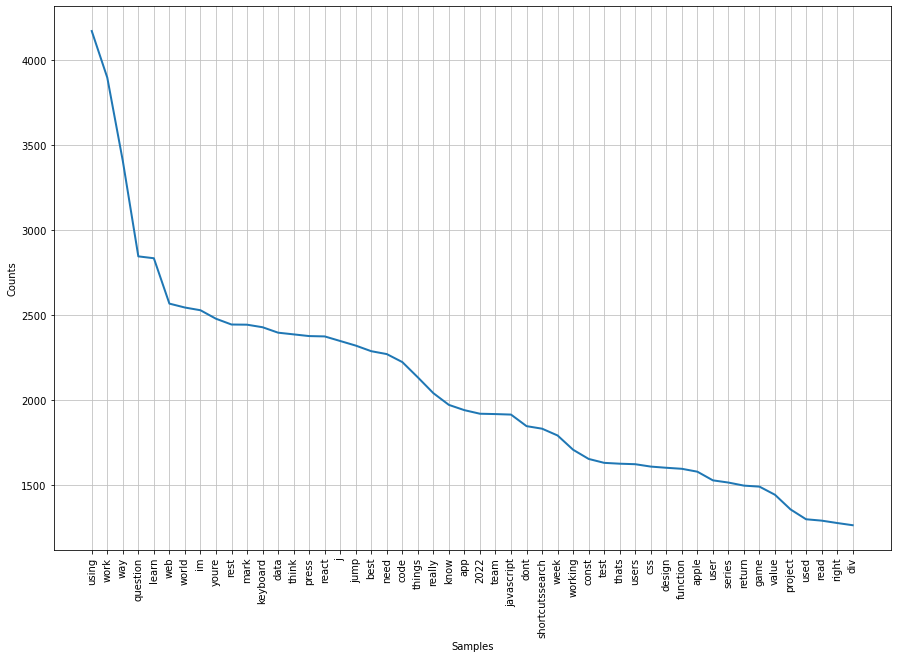

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [31]:
#Plotting frequency of keywords 

df_stop= pd.read_excel(r'C:\Users\lenovo\Desktop\data\stop.xlsx')
stops= df_stop['stopwords']

from nltk.tokenize import RegexpTokenizer
tok= RegexpTokenizer('\w+')
tokss= tok.tokenize(text)
tok=[]
for k in tokss:
    tok.append(k.lower())
new_tok= [t for t in tok if t not in stops]

from nltk import FreqDist
freq= FreqDist(new_tok)
plt.subplots(figsize=(15,10))
freq.plot(50)

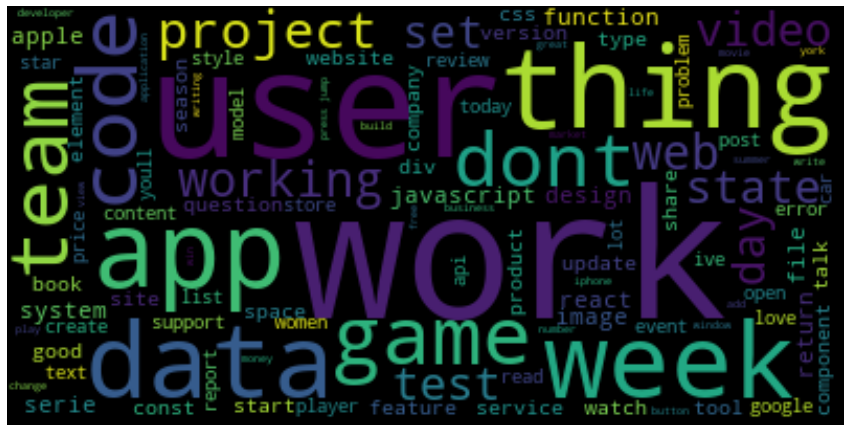

In [50]:
# Wordcloud on the keywords

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
stop_words= set(STOPWORDS)
stop_words.update(stops)
cloud= WordCloud(stopwords=stop_words).generate(df_1['nlp.keywords'].str.cat(sep=' '))
plt.imshow(cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [32]:
# Getting count of each keyword

from collections import Counter
counts = dict(Counter(new_tok))
a=list(counts.keys())
b=list(counts.values())
word_count= pd.DataFrame({'word':a,'count':b})
word_count.sort_values('count',ascending=False,inplace=True)
word_count

,word,count
25,using,4171
51,work,3897
112,way,3407
1262,question,2845
175,learn,2834
...,...,...
40021,albrioza,1
40024,caravans,1
40025,caravan,1
40027,snooping,1


## Characteristics of Text

In [ ]:
#Exploring characteristics of text(Polarity and Subjectivity)

df_1['text']=df_1['text'].astype('str')
from textblob import TextBlob
a=[]
b=[]
for i in df_1['text']:
    m= TextBlob(i)
    ae= m.sentiment.polarity
    be= m.sentiment.subjectivity
    a.append(ae)
    b.append(be)
df_1['polarity']=a
df_1['subjectivity']=b

In [48]:
#Polarity- Score, that lies in between -1 and 1, depicting how positive or negative or neutral the text is. 
# {1:positive,0:neutral,-1:negative}
# Subjectivity: Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. 
# Subjectivity is also a float which lies in the range of [0,1].

df_1.head()

,title,_id,authors,meta.description,nlp.keywords,nlp.summary,text,polarity,subjectivity
0,Useful Tools for Visualizing Databases on a Bu...,https://css-tricks.com/useful-tools-for-visual...,"[""Aisha Bukar"",""Mudashiru Toheeb""]",A diagram is a graphical representation of inf...,"[""tools"",""budget"",""useful"",""yes"",""csstricks"",""...","Export SQL Yes, with the support of SQL DDL st...",A diagram is a graphical representation of inf...,0.269211,0.569321
1,Single Element Loaders: The Spinner,https://css-tricks.com/single-element-loaders-...,"[""Temani Afif"",""Jim Holmberg""]",This four-part series covers how to create sin...,"[""gradient"",""element"",""single"",""bars"",""csstric...","In this article, though, we will see how to ma...",Making CSS-only loaders is one of my favorite ...,0.120813,0.448737
2,Am I on the IndieWeb yet?,https://css-tricks.com/am-i-on-the-indieweb-yet/,"[""Geoff Graham""]",Can't smash the Like button hard enough for wh...,"[""changes"",""plugin"",""csstricks"",""site"",""strugg...",My personal site is on WordPress and thereâs...,Canât smash the Like button hard enough for ...,0.114111,0.539404
3,Letâs Make a QR Code Generator With a Server...,https://css-tricks.com/lets-make-a-qr-code-gen...,"[""Geoff Graham""]","QR codes are funny, right? We love them, then ...","[""thats"",""generator"",""serverless"",""packages"",""...",There are like a gazillion QR code generators ...,"QR codes are funny, right? We love them, then ...",-0.074105,0.679403
4,Building Interoperable Web Components That Eve...,https://css-tricks.com/building-interoperable-...,"[""Adam Rackis""]",This post will show you how to build low-level...,"[""render"",""work"",""const"",""increment"",""csstrick...",Think of a React component which fetches some ...,Those of us whoâve been web developers more ...,0.121421,0.464249


<AxesSubplot:>

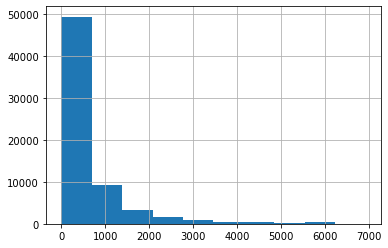

In [35]:
#Distribution of length of each article/post

df_1.text.str.split().\
    map(lambda x: len(x)).\
    hist()

<AxesSubplot:>

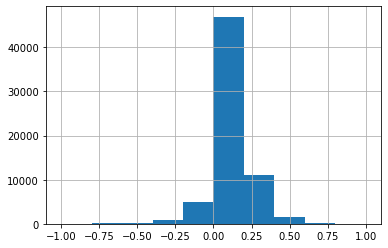

In [36]:
#Most of the texts are lying in the 0-0.25 range (that's close to neutral)

df_1['polarity'].hist()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4184\2914737850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['title']= df_1['title'].astype('str')


<AxesSubplot:>

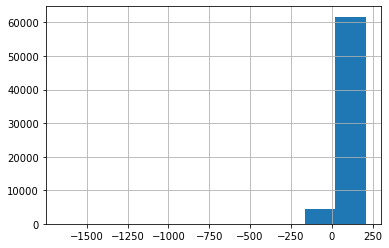

In [42]:
# flesch_reading_ease- refers to ease of reading and understanding. higher the better. 
# the range we got here is 0-200, so can't determine the majority

from textstat import flesch_reading_ease
df_1['title']= df_1['title'].astype('str')

df_1['title'].\
   apply(lambda x : flesch_reading_ease(x)).hist()

## Classification sample - Using Open source classifier (MonkeyLearn)

In [43]:
df_cla= pd.read_csv(r'C:\Users\lenovo\Desktop\Psytech\processed_batch.csv')

In [45]:
df_cla.head()

,Unnamed: 0,title,_id,authors,meta.description,nlp.keywords,nlp.summary,text,Classification,Confidence
0,0.0,Useful Tools for Visualizing Databases on a Bu...,https://css-tricks.com/useful-tools-for-visual...,"[""Aisha Bukar"",""Mudashiru Toheeb""]",A diagram is a graphical representation of inf...,"[""tools"",""budget"",""useful"",""yes"",""csstricks"",""...","Export SQL Yes, with the support of SQL DDL st...",A diagram is a graphical representation of inf...,Computers & Internet,0.898
1,1.0,Single Element Loaders: The Spinner,https://css-tricks.com/single-element-loaders-...,"[""Temani Afif"",""Jim Holmberg""]",This four-part series covers how to create sin...,"[""gradient"",""element"",""single"",""bars"",""csstric...","In this article, though, we will see how to ma...",Making CSS-only loaders is one of my favorite ...,Computers & Internet,0.284
2,2.0,Am I on the IndieWeb yet?,https://css-tricks.com/am-i-on-the-indieweb-yet/,"[""Geoff Graham""]",Can't smash the Like button hard enough for wh...,"[""changes"",""plugin"",""csstricks"",""site"",""strugg...",My personal site is on WordPress and thereâs...,Canât smash the Like button hard enough for ...,Computers & Internet,0.918
3,3.0,Letâs Make a QR Code Generator With a Server...,https://css-tricks.com/lets-make-a-qr-code-gen...,"[""Geoff Graham""]","QR codes are funny, right? We love them, then ...","[""thats"",""generator"",""serverless"",""packages"",""...",There are like a gazillion QR code generators ...,"QR codes are funny, right? We love them, then ...",Computers & Internet,0.865
4,4.0,Building Interoperable Web Components That Eve...,https://css-tricks.com/building-interoperable-...,"[""Adam Rackis""]",This post will show you how to build low-level...,"[""render"",""work"",""const"",""increment"",""csstrick...",Think of a React component which fetches some ...,Those of us whoâve been web developers more ...,Computers & Internet,0.698


In [46]:
df_cla['Classification'].value_counts()

Computers & Internet          701
Society                        40
Business & Finance             33
Entertainment & Recreation     32
Consumer Electronics           29
Science & Mathematics          23
Humanities                     16
Health & Medicine               8
Home                            6
Education                       5
Food & Drink                    3
Beauty & Style                  2
Environment                     1
Animals                         1
Name: Classification, dtype: int64

### Integrating with MonkeyLearn API

In [55]:
from monkeylearn import MonkeyLearn

# Instantiate the client Using your API key
ml = MonkeyLearn('46f3a5e27ab36d51f08655d3f31cda88b5fc6d68')

In [72]:
data=[]
for i in df_1.sample(80)['text']:
    data.append(i)

In [73]:
response = ml.classifiers.classify(model_id='cl_o46qggZq',data=data)

In [76]:
df_clo=pd.DataFrame(response.body)
df_clo.sample(15)

,text,external_id,error,classifications
31,The element you are going to focus has to be f...,None,False,"[{'tag_name': 'Entertainment & Recreation', 't..."
60,The award-winning team behind Xbox's candid si...,None,False,"[{'tag_name': 'Entertainment & Recreation', 't..."
63,These Class Keeper Memory Binders make it so e...,None,False,"[{'tag_name': 'Education', 'tag_id': 81180876,..."
44,The next generation of Apple silicon has arriv...,None,False,"[{'tag_name': 'Computers & Internet', 'tag_id'..."
22,Someone has been rootling about in the files o...,None,False,"[{'tag_name': 'Entertainment & Recreation', 't..."
66,In the last post we had a bit of a look at Vie...,None,False,"[{'tag_name': 'Home', 'tag_id': 81180863, 'con..."
64,Press J to jump to the feed. Press question ma...,None,False,"[{'tag_name': 'Humanities', 'tag_id': 81180867..."
76,From where do you get ui design for making you...,None,False,"[{'tag_name': 'Computers & Internet', 'tag_id'..."
29,I'm trying to send data to the server but when...,None,False,"[{'tag_name': 'Computers & Internet', 'tag_id'..."
8,"Kabir Sehgal, a corporate strategist, Grammy-w...",None,False,"[{'tag_name': 'Humanities', 'tag_id': 81180867..."
